# Stochastic Gradient Descent(SGD)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generate Data

In [42]:
X = 2 * np.random.rand(1000,1)
y = 4 +3 * X+np.random.randn(1000,1)

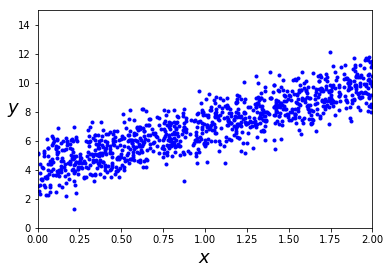

In [43]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [45]:
X_b = np.c_[np.ones((1000,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.0209418 ]
 [2.97483318]]


In [52]:
X_new = np.array([[0],[2]])
np.c_[np.ones((2,1)),X_new]

array([[1., 0.],
       [1., 2.]])

In [46]:
theta_hat = np.linalg.solve(X_b.T @ X_b, 
                            X_b.T @ y)
print(theta_hat)

[[4.0209418 ]
 [2.97483318]]


In [54]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.0209418 ],
       [9.97060815]])

[0, 2, 0, 15]

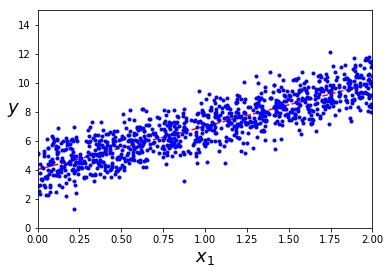

In [49]:
plt.plot(X_new,y_predict,'r--')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

# Gradien Descent

The cost function  for Linear regression given  by

<img src="cost_fction.png">

In [25]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. 
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,theta,lr=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    lr = learning rate
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*lr*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [26]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.967,
Theta1:          2.970
Final cost/MSE:  10431.931


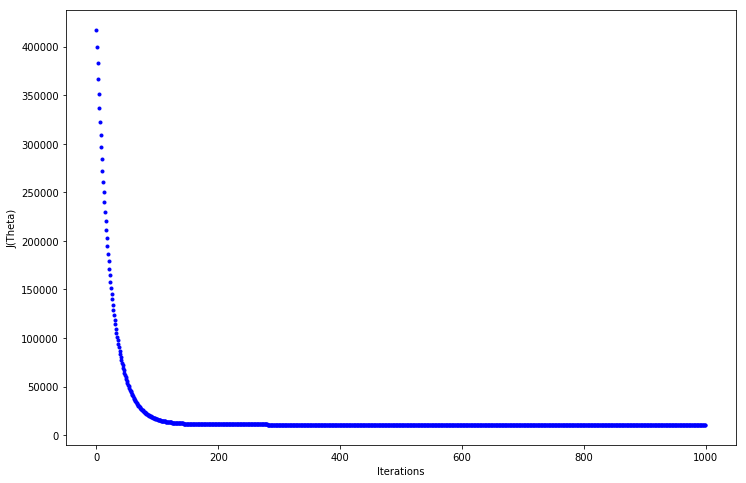

In [27]:
ig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

#  Stochastic Gradient Descent

In [28]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history


In [34]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))



Theta0:          4.003,
Theta1:          2.940
Final cost/MSE:  65.714


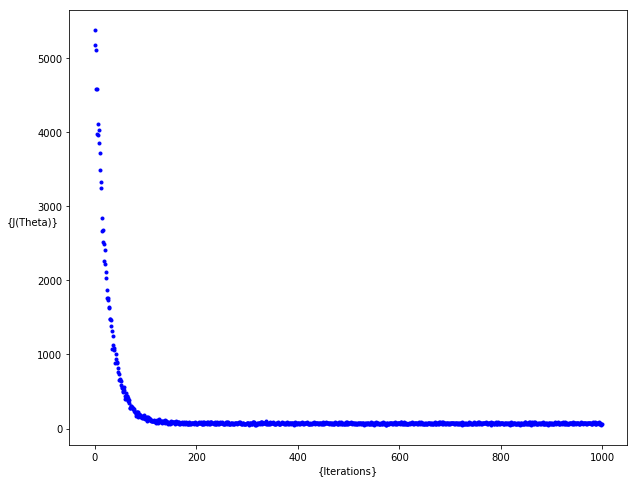

In [35]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

# Mini Batch Gradient Descent

In [36]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [39]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.914,
Theta1:          3.015
Final cost/MSE:  1356.325


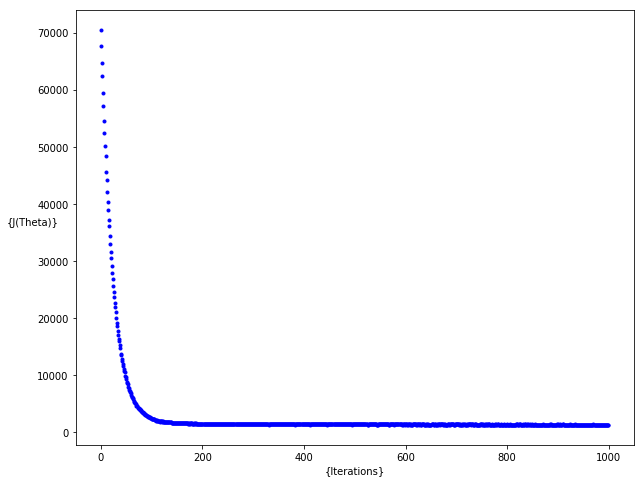

In [40]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')